In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

In [43]:
# 请替换为实际数据文件的路径
file_path = "数据集/energydata_complete.csv"


# 数据摘要和描述性统计

In [44]:
# 读取数据
data = pd.read_csv(file_path)

In [45]:
#显示概要
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [46]:
# 查看数据头部
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# 时间序列可视化

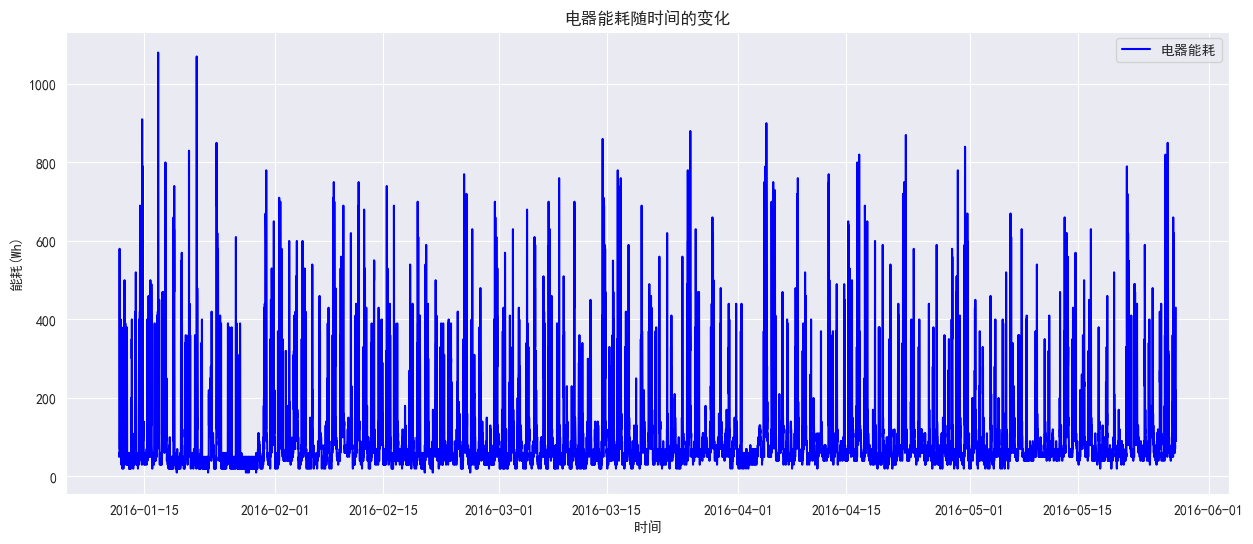

In [47]:
# 将时间列转换为datetime类型
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# 绘制家电能耗时间序列图
plt.figure(figsize=(15, 6))
plt.plot(data['Appliances'], label='电器能耗', color='blue')
plt.title('电器能耗随时间的变化')
plt.xlabel('时间')
plt.ylabel('能耗(Wh)')
plt.legend()
plt.show()


# 特征分布可视化

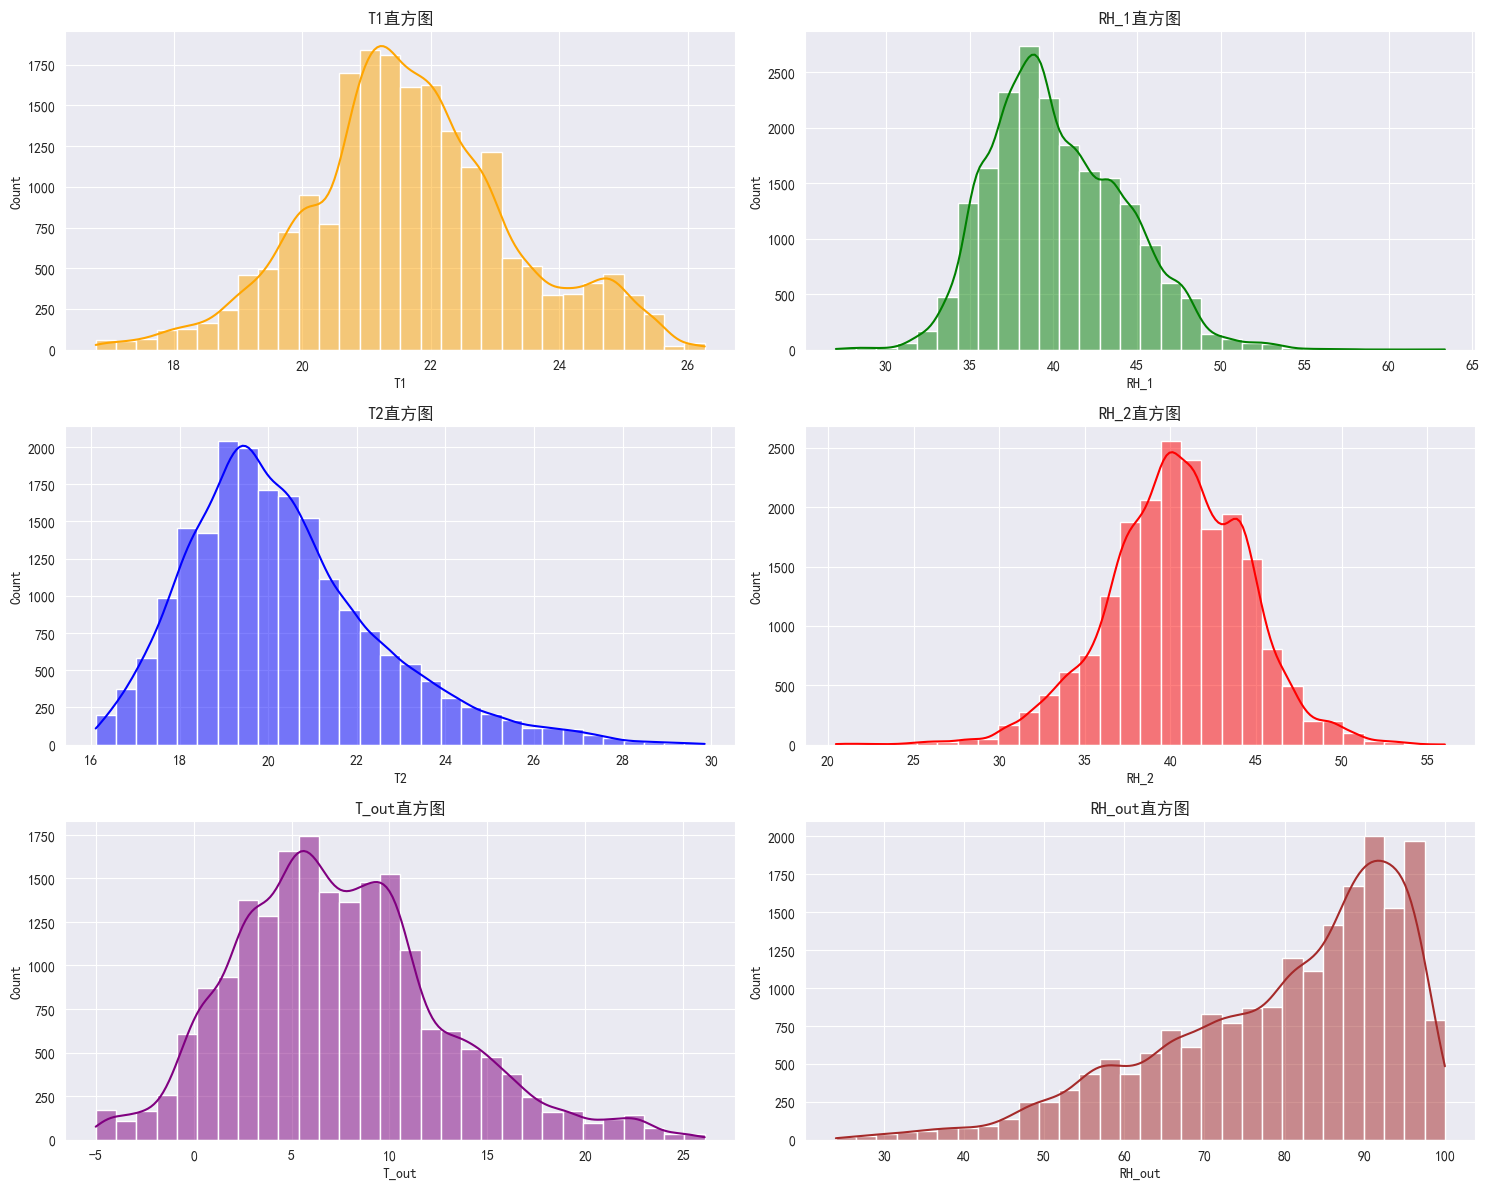

In [48]:
# 创建包含3行2列的子图网格，每个子图的大小为15x12英寸
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

# 绘制T1温度的直方图
sns.histplot(data['T1'], bins=30, kde=True, ax=axes[0, 0], color='orange')
axes[0, 0].set_title('T1直方图')

# 绘制RH_1相对湿度的直方图
sns.histplot(data['RH_1'], bins=30, kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('RH_1直方图')

# 绘制T2温度的直方图
sns.histplot(data['T2'], bins=30, kde=True, ax=axes[1, 0], color='blue')
axes[1, 0].set_title('T2直方图')

# 绘制RH_2相对湿度的直方图
sns.histplot(data['RH_2'], bins=30, kde=True, ax=axes[1, 1], color='red')
axes[1, 1].set_title('RH_2直方图')

# 绘制室外温度的直方图
sns.histplot(data['T_out'], bins=30, kde=True, ax=axes[2, 0], color='purple')
axes[2, 0].set_title('T_out直方图')

# 绘制室外相对湿度的直方图
sns.histplot(data['RH_out'], bins=30, kde=True, ax=axes[2, 1], color='brown')
axes[2, 1].set_title('RH_out直方图')

# 调整子图布局，确保它们适应整个图形区域，避免重叠
plt.tight_layout()

# 显示绘制的图形
plt.show()


# 特征相关性分析

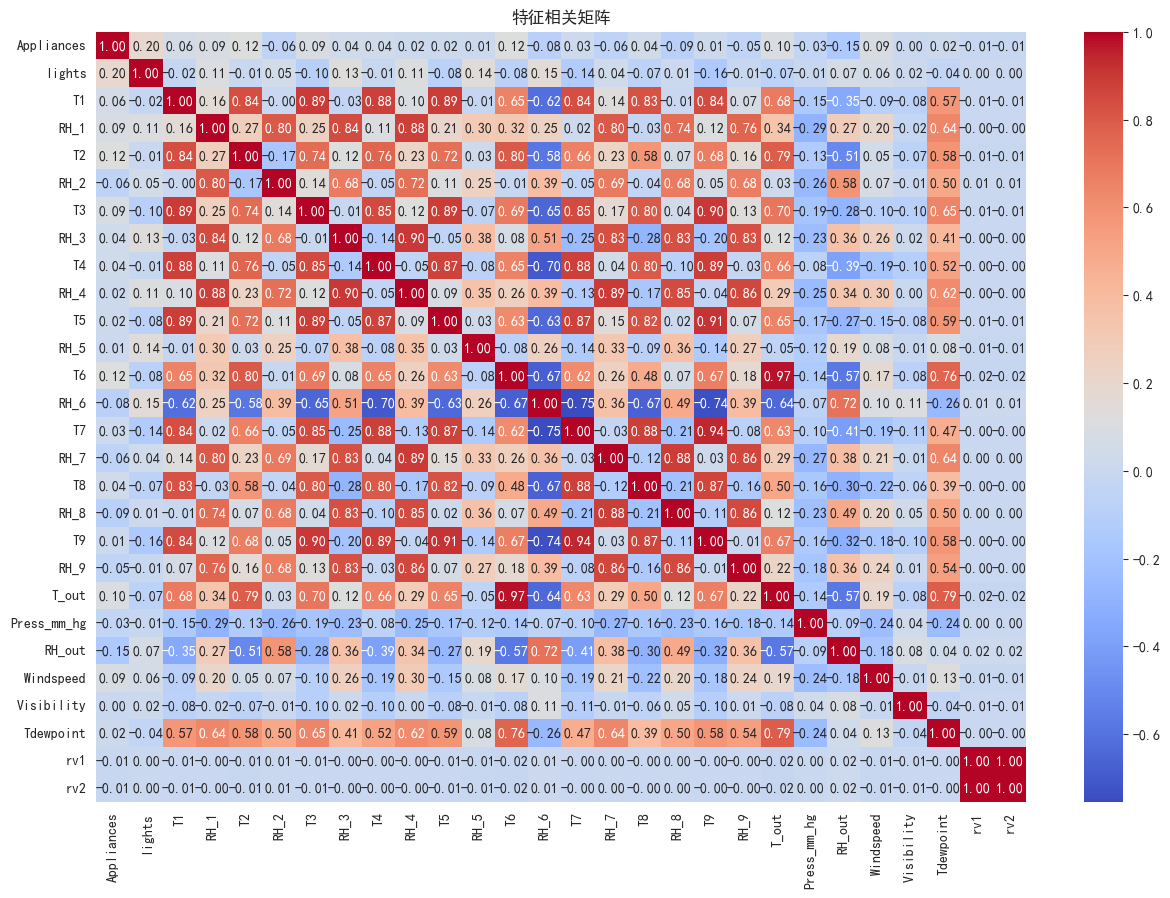

In [49]:
# 计算特征相关性
correlation_matrix = data.corr()

# 绘制热图
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('特征相关矩阵')
plt.show()


# 分析结论
1.电器和灯的能耗之间存在正相关关系（0.20）。
2.第⼆⼤相关性是设备和 T2(0.12) 之间。
3.房间与房间之间的相关性非常高：T1与T2(0.84)，T3(0.89)，T4(0.89)，T5(0.89)，T6(0.65)，T7(0.84)，T8(0.83)，T9(0.84)。
 推测：可能是由于通⻛使用了专门的HRV装置驱动，最⼤限度地减少了房间之间的空⽓温差，导致房间与房间之间存在密切的相关性。
4.电器的消耗和⻛速呈现正相关（0.09），压⼒和⻛速之间呈现负相关 (-0.23)。也就是说气压越低，⻛速越⾼，电器的能耗越⾼。
  推测：较高的风速可能意味着更恶劣的天气，室内活动也相应的增加，因而导致电器能耗增大。
5.RH1（厨房相对湿度）和电器呈正相关（0.06）。
  推测：较高的湿度可能是烹饪活动产生的，在烹饪的过程中电器的使用率显著增加，所以该区域的能耗也随之增大。

# 相关性可视化

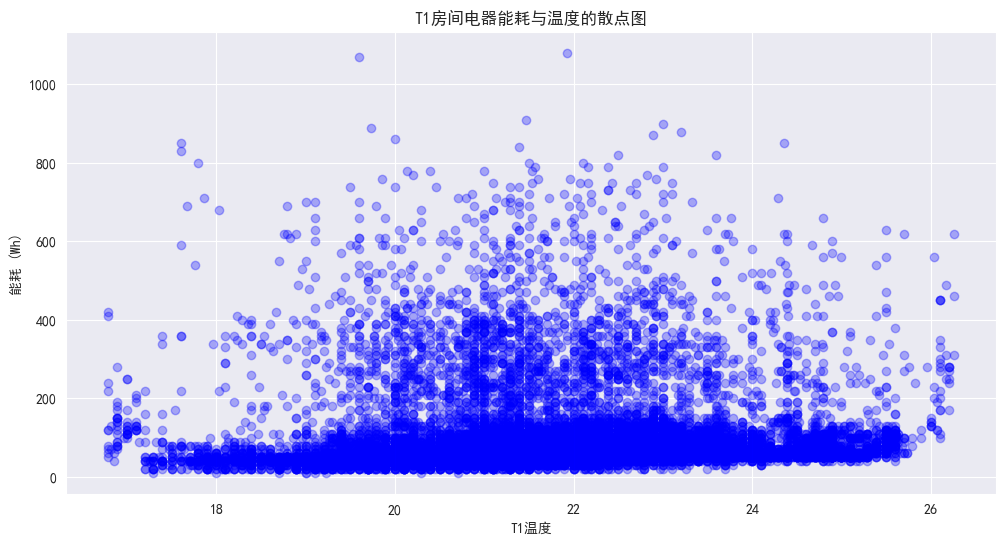

In [50]:
# 绘制家电能耗与温度的散点图
plt.figure(figsize=(12, 6))
plt.scatter(data['T1'], data['Appliances'], alpha=0.3, color='blue')
plt.title('T1房间电器能耗与温度的散点图')
plt.xlabel('T1温度')
plt.ylabel('能耗 (Wh)')
plt.show()


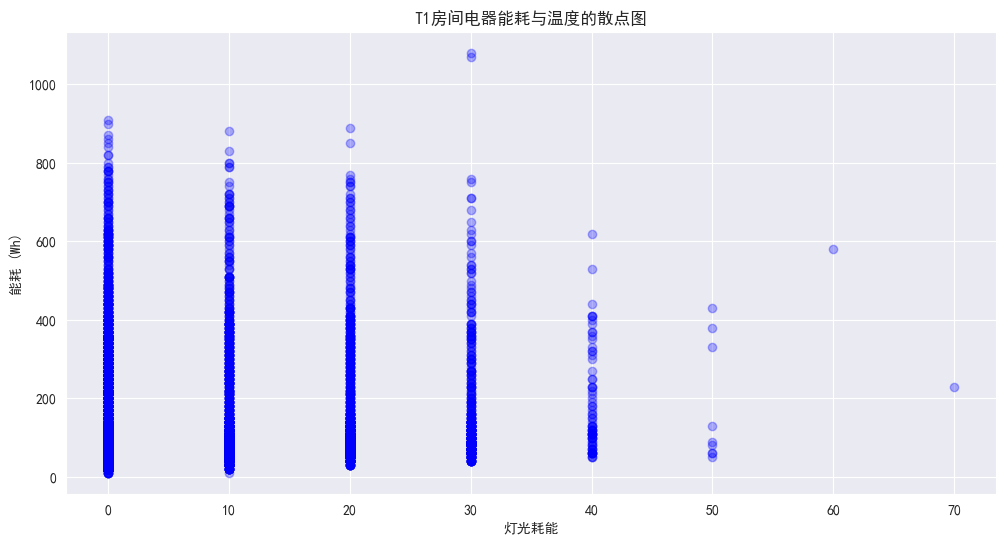

In [51]:
# 绘制家电能耗与灯光的散点图
plt.figure(figsize=(12, 6))
plt.scatter(data['lights'], data['Appliances'], alpha=0.3, color='blue')
plt.title('T1房间电器能耗与温度的散点图')
plt.xlabel('灯光耗能')
plt.ylabel('能耗 (Wh)')
plt.show()


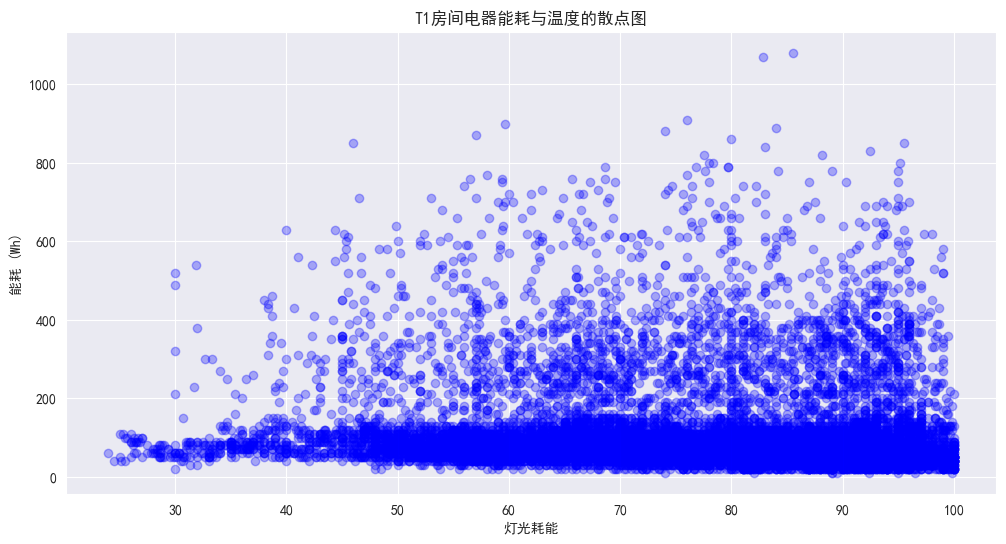

In [52]:
# 绘制家电能耗与灯光的散点图
plt.figure(figsize=(12, 6))
plt.scatter(data['RH_out'], data['Appliances'], alpha=0.3, color='blue')
plt.title('T1房间电器能耗与温度的散点图')
plt.xlabel('灯光耗能')
plt.ylabel('能耗 (Wh)')
plt.show()